# <center> Geospatial Analysis </center>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas

In [5]:
pd.options.display.max_rows = 10

In [6]:
df_divisions = geopandas.read_file("../dataset/pd_divisions_datasd")
df_beats = geopandas.read_file("../dataset/pd_beats_datasd")
df_stops = pd.read_csv('../dataset/final_combined_dataset_v3.csv')

In [7]:
def construct_beats(input_beats):
    '''
    Construct the dataframe for beats.
    This function uses global dfs.
    
    :param input_beats: beats dataframe.
    :type input_beats: pandas dataframe.
    :returns: pandas dataframe
    '''
    
    #Construct the dataframe for beats. This is used to merge and get the divisions.
    beats_dataframe = input_beats[['serv', 'div']]
    beats_dataframe = beats_dataframe.groupby('serv').first()
    beats_dataframe = beats_dataframe[['div']]
    
    #clean the indices and datatypes
    beats_dataframe = beats_dataframe.reset_index()
    beats_dataframe['serv'] = beats_dataframe['serv'].astype(int)
    
    return beats_dataframe

In [8]:
construct_beats(df_beats)

,serv,div
0,0,0
1,110,1
2,120,1
3,230,2
4,240,2
...,...,...
15,720,7
16,810,8
17,820,8
18,830,8


In [9]:
def divsums(count, beats, divisions):
    '''
    This function returns the geopandas dataframe which has both geometric specifications from beats and count per location obtained from count.
    
    :type count: pandas dataframe.
    :param count: pandas dataframe, which contains the data which is used to corelate with beats.
    :type beats: pandas dataframe.
    :param beats: location dataframe.
    :type divisions: geopandas dataframe
    :param divisions: filename for source text 
    :returns: geopandas dataframe
    '''
    # clean the count dataframe
    count_clean = count.reset_index()
    count_clean['service_area'] = count_clean['service_area'].astype(int)
   
    # Joining the count to the beats dataframe
    count_wrt_serv = beats.join(count_clean.set_index('service_area'), on='serv').dropna()
    count_wrt_serv[['arrested']] = count_wrt_serv[['arrested']].fillna(0)
    
    # Joining the above dataframe with division dataframe
    count_wrt_serv = count_wrt_serv.groupby('div').sum()['arrested']
    return divisions.join(count_wrt_serv, on='div_num')

In [10]:
df_stops_serive_area = df_stops[['service_area', 'arrested']]
print(df_stops_serive_area)

        service_area  arrested
0                830         0
1                830         0
2                830         0
3                610         0
4                810         0
...              ...       ...
430471           110         0
430472           710         0
430473           520         0
430474           310         0
430475           310         0

[430476 rows x 2 columns]


In [11]:
def plot_map(input_geopandasdf):
    '''
    This function plots the geopandas dataframe. This dataframe contains information of count per division in geopandas dataframe.
    
    :type input_geopandasdf: geopandas dataframe
    :param input_geopandasdf: geopandas dataframee containing count inforamtion per division and geographical specifications of the division.
    '''
    ax = input_geopandasdf.plot(column='arrested', figsize=(25, 9), cmap='Blues', legend=True)
    input_geopandasdf.apply(lambda x: ax.annotate(text=x.div_name.capitalize(), xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
    ax.set_axis_off()

In [12]:
def stop_data_for_plotting(stops, beats, divisions):
    '''
    This function cleans the dataframe data. returns a geopandas dataframe for stop count which can be plotted.
    
    :type stops: pandas dataframe.
    :param stops: filename for source text.
    :param input_beats: beats dataframe.
    :type input_beats: pandas dataframe.
    :type divisions: geopandas dataframe
    :param divisions: filename for source text 
    :returns: geopandas dataframe for stop count which can be plotted. 
    '''
    # Cleanup data
    df_stops_serive_area = stops[['service_area', 'arrested']]
    
    # Build counts
    # Amount of stops per service area
    stop_count = df_stops_serive_area.groupby('service_area').count()
    # Build beats
    beats_dataframe = construct_beats(beats)
    
    # Build divsums
    divsums_stop_dataframe = divsums(stop_count, beats_dataframe, divisions)
    return divsums_stop_dataframe

In [13]:
stop_data_for_plotting(df_stops, df_beats, df_divisions)

,objectid,div_num,div_name,geometry,arrested
0,1,1,NORTHERN,"POLYGON ((6257399.474 1913720.405, 6258021.781...",61616
1,2,2,NORTHEASTERN,"POLYGON ((6329136.046 1985638.386, 6329132.056...",51280
2,3,3,EASTERN,"POLYGON ((6321693.529 1885496.923, 6320946.312...",56285
3,4,5,CENTRAL,"POLYGON ((6287304.000 1850636.000, 6287303.000...",51538
4,5,6,WESTERN,"POLYGON ((6280788.358 1873275.706, 6280793.053...",42274
5,6,7,SOUTHERN,"POLYGON ((6294084.233 1801858.103, 6294115.999...",44716
6,7,8,MID-CITY,"POLYGON ((6300696.000 1863112.000, 6300797.593...",50207
7,8,9,NORTHWESTERN,"POLYGON ((6290347.459 1952824.477, 6290674.051...",22194
8,9,4,SOUTHEASTERN,"POLYGON ((6314753.250 1851441.908, 6314774.253...",38319


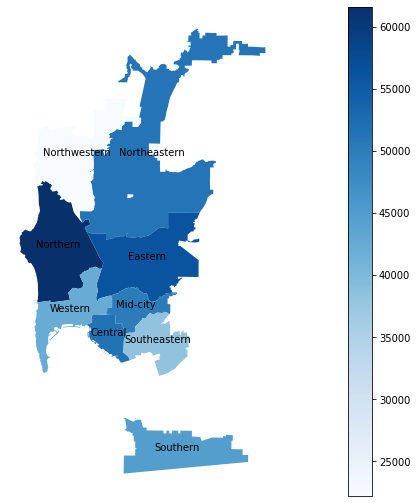

In [14]:
stop_data_div = stop_data_for_plotting(df_stops, df_beats, df_divisions)
plot_map(stop_data_div)

In [15]:
def arrest_data_for_plotting(stops, beats, divisions):
    '''
    This function cleans the dataframe data. returns a geopandas dataframe for arrest count which can be plotted.
    
    :type stops: pandas dataframe.
    :param stops: filename for source text.
    :param input_beats: beats dataframe.
    :type input_beats: pandas dataframe.
    :type divisions: geopandas dataframe
    :param divisions: filename for source text 
    :returns: geopandas dataframe for arrest count which can be plotted. 
    '''
    # Cleanup data
    df_stops_serive_area = stops[['service_area', 'arrested']]
    
    # Build counts
    # Amount of stops per service area
    stop_count = df_stops_serive_area.groupby('service_area').count()
    
    arrested_final_count = df_stops_serive_area.loc[df_stops_serive_area['arrested'] == 1].groupby('service_area').count()
    probability_of_arrest = (arrested_final_count/stop_count).fillna(0)
  
    # Build beats
    beats_dataframe = construct_beats(beats)
    
    # Build divsums
    divsums_arrest_dataframe = divsums(probability_of_arrest, beats_dataframe, divisions)
    return divsums_arrest_dataframe

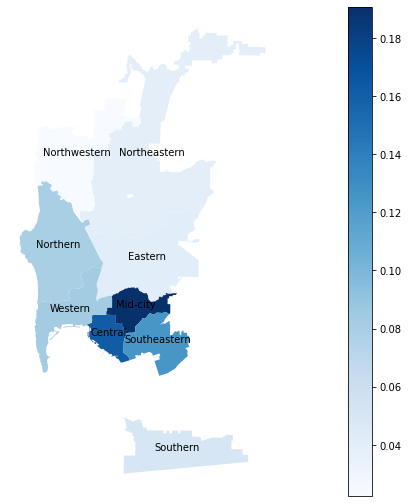

In [16]:
arrest_data_div = arrest_data_for_plotting(df_stops, df_beats, df_divisions)
plot_map(arrest_data_div)

# <center> Geospatial Analysis Ends </center>